In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.dates as mdates
from scan_functions import create_latest_df, concatenate_to_series
from scan_functions import create_plot, from_single_csv_to_plot

In [21]:
files = {}
for file in os.listdir('../rolling_timeseries'):
    if file[:9] == 'övre_esse':
        #print(file[:9])
        files[file[:-4]] = pd.read_csv(f'../rolling_timeseries/{file}')

In [ ]:
monthly = {}
for k,v in files.items():
        v['date'] = pd.to_datetime(v['date'])
        v.set_index(['date'],inplace=True)
    
    for k,v in files.items():
        monthly[k] = v.resample('ME').mean().reset_index()
        monthly[k]['month'] = monthly[k]['date'].dt.month
    

In [60]:

def aggregate_monthly(df):
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['date'],inplace=True)

    df = df.resample('ME').mean().reset_index()
    df['month'] = df['date'].dt.month
    return df
    

In [13]:
evi25 = pd.read_csv('../rolling_timeseries/evijärvi_2025.csv')
evi25_monthly = aggregate_monthly(evi25)
evi25_monthly

In [27]:
övre_esse25 = pd.read_csv('../rolling_timeseries/övre_esse_2025.csv')
övre_esse25_monthly = aggregate_monthly(övre_esse25)
övre_esse25_monthly

,date,mean,std,month
0,2025-06-30,0.062289,0.076834,6
1,2025-07-31,0.121227,0.088195,7
2,2025-08-31,0.061465,0.097187,8


In [9]:
#evi = pd.read_csv("../timeseries/evijärvi_all_mean.csv")
#evi.loc[2,'2025'] = evi25_monthly.loc[2,'mean']
#evi.to_csv("../timeseries/evijärvi_all_mean.csv",index=False)
övre_esse = pd.read_csv("../timeseries/övre_esse_all_mean.csv")

In [35]:
övre_esse = pd.read_csv("../timeseries/övre_esse_all_mean.csv")
övre_esse.loc[2,'2025'] = övre_esse25_monthly.loc[2,'mean']
övre_esse.to_csv("../timeseries/övre_esse_all_mean.csv",index=False)

In [36]:
övre_esse

,month,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,6,0.095644,0.081672,0.063753,0.102146,0.101405,0.121727,0.096405,0.072866,0.078169,0.062289
1,7,0.094293,0.088200,0.105462,0.092266,0.058893,0.113009,0.104217,0.097346,0.080827,0.123711
2,8,0.106309,0.085075,0.100606,0.082678,0.177614,0.098912,0.124961,0.120671,0.217760,0.061465


In [82]:
nedre_esse = {}
for file in os.listdir('../rolling_timeseries'):
    if file[:10] == 'nedre_esse':
        #print(file[:9])
        nedre_esse[file[:-4]] = pd.read_csv(f'../rolling_timeseries/{file}')

In [31]:
#nedre_esse

In [83]:
nedre_esse_monthly = {}
for k,v in nedre_esse.items():
        nedre_esse_monthly[k] = aggregate_monthly(v)
    

In [84]:
all_nedre_esse_df = pd.DataFrame()
for k,v in nedre_esse_monthly.items():
    if k[-4:] == '2015':
        continue
    all_nedre_esse_df[k[-4:]] = v['mean']


In [ ]:
all_

In [85]:
#all_nedre_esse_df['month'] = [6,7,8]
all_nedre_esse_df.insert(0,'month',[6,7,8])

In [86]:
all_nedre_esse_df

,month,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,6,0.1390,0.107286,0.139889,0.183375,0.1592,0.1508,0.175500,0.155875,0.148426,0.195400
1,7,0.2045,0.186750,0.240000,0.153875,0.1600,0.2037,0.189125,0.167400,0.145457,0.184923
2,8,0.1870,0.075000,0.178333,0.193400,0.2480,0.1718,0.209250,0.151000,0.190868,0.148800


In [87]:
all_nedre_esse_df.to_csv('nedre_esse_all_mean.csv')

In [170]:
all_df = monthly['evijärvi_2016']

In [181]:
all_mean = monthly['evijärvi_2016'][['month','mean']]
all_mean.rename(columns={'mean':'2016'},inplace=True)
i = 0
for k,v in monthly.items():
    if k[-2:] == '15':
        print('15')
        continue
    if i == 0:
        i += 1
        continue
    print(k[-4:])
    all_mean[k[-4:]] = v['mean'][]
    

15
2017
2018
2019
2020
2021
2022
2023
2024
2025


C:\Users\jim.anderssen\AppData\Local\Temp\ipykernel_19452\1498027546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_mean.rename(columns={'mean':'2016'},inplace=True)
C:\Users\jim.anderssen\AppData\Local\Temp\ipykernel_19452\1498027546.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_mean[k[-4:]] = v['mean']


In [183]:
all_mean.to_csv('../timeseries/evijärvi_all_mean.csv',index=False,sep=',')

In [184]:
all_mean

,month,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,6,0.036742,0.025125,0.026761,0.049203,0.067900,0.082666,0.086232,0.050362,0.055756,0.059314
1,7,0.074553,0.079364,0.083678,0.046094,0.096594,0.078502,0.101898,0.062128,0.079307,0.103763
2,8,0.072963,0.049948,0.092661,0.053626,0.162959,0.078241,0.115290,0.060333,0.189028,NaN


In [26]:
post_agg_esse = {}

for k,v in files.items():
    post_agg_esse[k] = aggregate_monthly(v)

In [64]:
all_std_esse = post_agg_esse['övre_esse_2016'][['month','std']]
all_std_esse.rename(columns={'std':'2016'},inplace=True)
i = 0
for k,v in post_agg_esse.items():
    if k[-2:] == '15':
        print('15')
        continue
    if i == 0:
        i += 1
        continue
    print(k[-4:])
    all_std_esse[k[-4:]] = v['std']
    

15
2017
2018
2019
2020
2021
2022
2023
2024
2025


C:\Users\jim.anderssen\AppData\Local\Temp\ipykernel_35048\3972167549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_std_esse.rename(columns={'std':'2016'},inplace=True)
C:\Users\jim.anderssen\AppData\Local\Temp\ipykernel_35048\3972167549.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_std_esse[k[-4:]] = v['std']


In [65]:
all_std_esse

,month,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,6,0.105394,0.111338,0.123922,0.110552,0.097503,0.104629,0.086974,0.077215,0.084558,0.076834
1,7,0.118400,0.139423,0.116206,0.091668,0.099216,0.100033,0.074614,0.081047,0.073741,0.091025
2,8,0.079916,0.086005,0.085550,0.091490,0.057596,0.083461,0.088883,0.074811,0.050553,NaN


In [61]:
all_mean_esse.T

,0,1,2
month,6.000000,7.000000,8.000000
2016,0.095644,0.094293,0.106309
2017,0.081672,0.088200,0.085075
2018,0.063753,0.105462,0.100606
2019,0.102146,0.092266,0.082678
2020,0.101405,0.058893,0.177614
2021,0.121727,0.113009,0.098912
2022,0.096405,0.104217,0.124961
2023,0.072866,0.097346,0.120671
2024,0.078169,0.080827,0.217760


In [33]:
all_mean_esse.to_csv('övre_esse_all_mean.csv',index=False,sep=',')

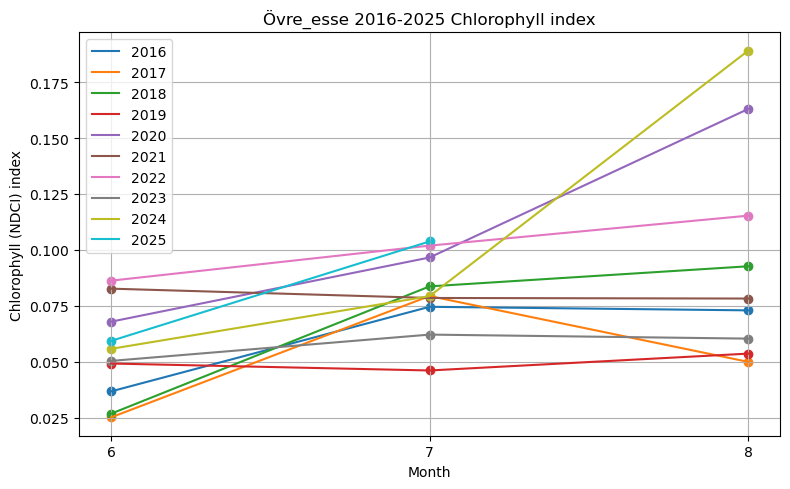

In [35]:



fig, ax = plt.subplots(figsize=(8, 5))
for col in all_mean_esse.columns:
    if col == 'month':
        continue
    ax.plot(evi['month'], evi[col],label=col)
    ax.scatter(evi['month'], evi[col])
# Format x-axis to show only month and day


# Optional: rotate x-tick labels for readability
plt.xticks(ticks=evi['month']) #rotation=45
#locator = mdates.DayLocator(interval=5)
#formatter = mdates.DateFormatter('%m-%d')

#ax.xaxis.set_major_locator(locator)
#ax.xaxis.set_major_formatter(formatter)

plt.legend()

plt.xlabel('Month')
plt.ylabel('Chlorophyll (NDCI) index')
plt.title(f'Övre_esse 2016-2025 Chlorophyll index')
plt.tight_layout()
plt.grid()
plt.savefig(f'../plots/Övre esse 2016-2025 CI.png')
plt.show()


In [49]:
all_mean_esse.T.iloc[1:,2].index

Index(['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024',
       '2025'],
      dtype='object')

In [66]:
y_err = all_std_esse.T.iloc[1:, 2]  # <-- Make sure this exists

#ax.errorbar(x, y, yerr=y_err, label='MeanI', fmt='-o', capsize=4)

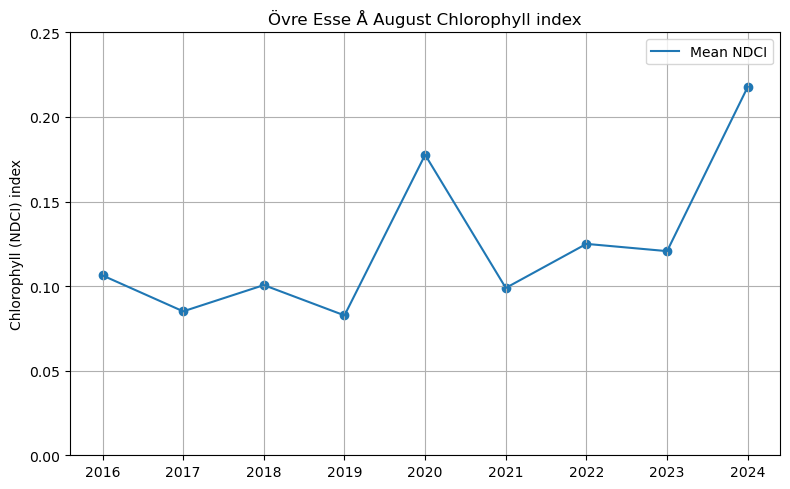

In [84]:



fig, ax = plt.subplots(figsize=(8, 5))

y = all_mean_esse.T.iloc[1:,2]
x = y.index
#ax.errorbar(x, y, yerr=y_err, label='Std dev.', capsize=4)
ax.plot(x,y, label='Mean NDCI')
ax.scatter(x,y)
#ax.plot(x,y, label='Mean NDCI')
#ax.scatter(evi['month'], evi[col])
# Format x-axis to show only month and day


# Optional: rotate x-tick labels for readability
#plt.xticks(ticks=evi['month']) #rotation=45
#locator = mdates.DayLocator(interval=5)
#formatter = mdates.DateFormatter('%m-%d')

#ax.xaxis.set_major_locator(locator)
#ax.xaxis.set_major_formatter(formatter)

plt.legend()

#plt.xlabel('Month')
plt.ylabel('Chlorophyll (NDCI) index')
plt.title(f'Övre Esse Å August Chlorophyll index')
plt.yticks([0,0.05,0.1,0.15,0.2,0.25])
plt.tight_layout()
plt.grid()
plt.savefig(f'../plots/Övre esse Augusti CI.png')
plt.show()


In [23]:
evi.T

,0,1,2
month,6.000000,7.000000,8.000000
2016,0.036742,0.074553,0.072963
2017,0.025125,0.079364,0.049948
2018,0.026761,0.083678,0.092661
2019,0.049203,0.046094,0.053626
2020,0.067900,0.096594,0.162959
2021,0.082666,0.078502,0.078241
2022,0.086232,0.101898,0.115290
2023,0.050362,0.062128,0.060333
2024,0.055756,0.079307,0.189028


In [21]:
evi.T.iloc[1:,2]

2016    0.072963
2017    0.049948
2018    0.092661
2019    0.053626
2020    0.162959
2021    0.078241
2022    0.115290
2023    0.060333
2024    0.189028
2025    0.063599
Name: 2, dtype: float64

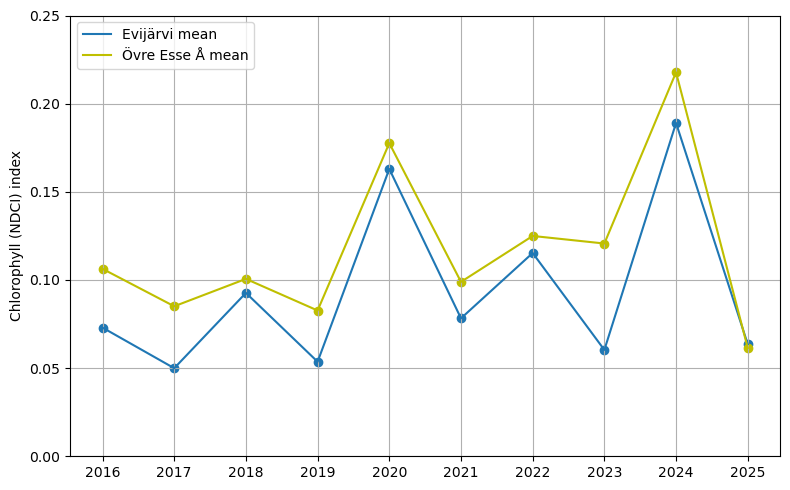

In [41]:



fig, ax = plt.subplots(figsize=(8, 5))

y1 = evi.T.iloc[1:,2]
x1 = y1.index
#ax.errorbar(x, y, yerr=y_err, label='Std dev.', capsize=4)
ax.plot(x1,y1, label='Evijärvi mean')
ax.scatter(x1,y1)

y2 = övre_esse.T.iloc[1:,2]
x2 = y2.index
#ax.errorbar(x, y, yerr=y_err, label='Std dev.', capsize=4)
ax.plot(x2,y2, label='Övre Esse Å mean',color='y')
ax.scatter(x2,y2,color='y')
#ax.plot(x,y, label='Mean NDCI')
#ax.scatter(evi['month'], evi[col])
# Format x-axis to show only month and day


# Optional: rotate x-tick labels for readability
#plt.xticks(ticks=evi['month']) #rotation=45
#locator = mdates.DayLocator(interval=5)
#formatter = mdates.DateFormatter('%m-%d')

#ax.xaxis.set_major_locator(locator)
#ax.xaxis.set_major_formatter(formatter)

plt.legend(loc='upper left')

#plt.xlabel('Month')
plt.ylabel('Chlorophyll (NDCI) index')
#plt.title(f'Evijärvi August Chlorophyll index')
plt.yticks([0,0.05,0.1,0.15,0.2,0.25])
plt.tight_layout()
plt.grid()
plt.savefig(f'../plots/övre esse + Evijärvi Augusti CI.png')
plt.show()


In [17]:
evi2020 = pd.read_csv('../rolling_timeseries/evijärvi_2020.csv')
övre_esse2020 = pd.read_csv('../rolling_timeseries/övre_esse_2020.csv')
nedre_esse2020 = pd.read_csv('../rolling_timeseries/nedre_esse_2020.csv')

nedre_esse2020['date'] = pd.to_datetime(nedre_esse2020['date'])
övre_esse2020['date'] = pd.to_datetime(övre_esse2020['date'])
evi2020['date'] = pd.to_datetime(evi2020['date'])

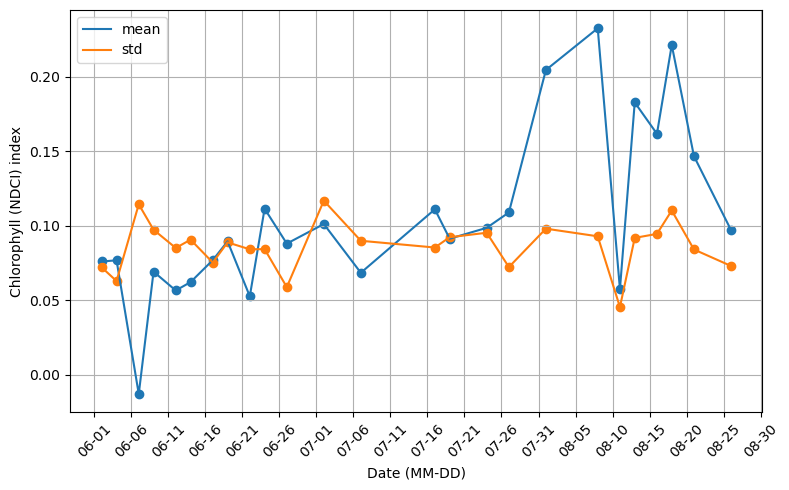

In [20]:
fig, ax = plt.subplots(figsize=(8, 5))

#ax.plot(nedre2024['date'], nedre2024['mean'],label='Nedre esse å')
#ax.scatter(nedre2024['date'], nedre2024['mean'])

#ax.plot(övre2024['date'], övre2024['mean'],label='Övre esse å',color='y')
#ax.scatter(övre2024['date'], övre2024['mean'],color='y')

ax.plot(evi2020['date'], evi2020['mean'],label='mean')
ax.scatter(evi2020['date'], evi2020['mean'])
ax.plot(evi2020['date'], evi2020['std'],label='std')
ax.scatter(evi2020['date'], evi2020['std'])


# Format x-axis to show only month and day


# Optional: rotate x-tick labels for readability
plt.xticks(rotation=45)
locator = mdates.DayLocator(interval=5)
formatter = mdates.DateFormatter('%m-%d')

ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)



plt.legend()
plt.xlabel('Date (MM-DD)')
plt.ylabel('Chlorophyll (NDCI) index')
#plt.title(f'{name} Chlorophyll index')
plt.tight_layout()
plt.grid()
plt.savefig('../plots/evijärvi_2020.png')

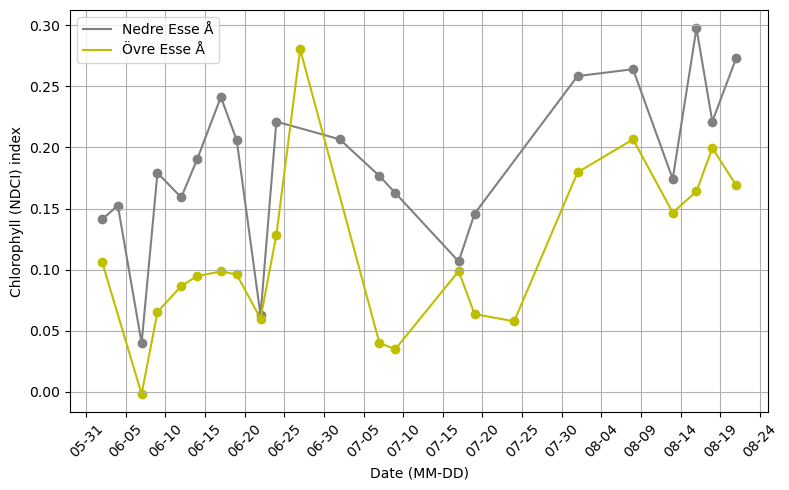

In [25]:
fig, ax = plt.subplots(figsize=(8, 5))

#ax.plot(nedre2024['date'], nedre2024['mean'],label='Nedre esse å')
#ax.scatter(nedre2024['date'], nedre2024['mean'])

#ax.plot(övre2024['date'], övre2024['mean'],label='Övre esse å',color='y')
#ax.scatter(övre2024['date'], övre2024['mean'],color='y')


ax.plot(nedre_esse2020['date'], nedre_esse2020['mean'],label='Nedre Esse Å',color='gray')
ax.scatter(nedre_esse2020['date'], nedre_esse2020['mean'],color='gray')
ax.plot(övre_esse2020['date'], övre_esse2020['mean'],label='Övre Esse Å',color='y')
ax.scatter(övre_esse2020['date'], övre_esse2020['mean'],color='y')


# Format x-axis to show only month and day


# Optional: rotate x-tick labels for readability
plt.xticks(rotation=45)
locator = mdates.DayLocator(interval=5)
formatter = mdates.DateFormatter('%m-%d')

ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)



plt.legend()
plt.xlabel('Date (MM-DD)')
plt.ylabel('Chlorophyll (NDCI) index')
#plt.title(f'{name} Chlorophyll index')
plt.tight_layout()
plt.grid()
plt.savefig('../plots/övre_och_nedre_esse_å_2020.png')